In [1]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import chi2, f_classif
import pandas as pd
import numpy as np
# Load the dataset 
data = pd.read_csv("bodyfat.csv")

# Extract features and target variable
X = data.drop(['Density'], axis=1)  # Features
y = data['Density']  # Target variable

# Discretize the target variable into bins
num_bins = 5  # Adjust the number of bins as needed
kbins = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
y_discrete = kbins.fit_transform(y.values.reshape(-1, 1)).ravel()  # Convert to 1D array

# Perform Chi-squared test
chi2_scores, p_values_chi2 = chi2(X, y_discrete)

# Perform Anova test
f_scores, p_values_anova = f_classif(X, y_discrete)

# Create DataFrame to store results
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Chi-squared Score': chi2_scores,
    'Chi-squared p-value': p_values_chi2,
    'Anova F-score': f_scores,
    'Anova p-value': p_values_anova
})

# Rank features based on importance
feature_importance_ranked = feature_importance.sort_values(by=['Chi-squared Score', 'Anova F-score'], ascending=False)

Ranked Features using Decision Tree:
BodyFat: 0.9811065053902933
Age: 0.0007088114961762544
Weight: 0.0006519175499321069
Height: 6.0038615539806703e-05
Neck: 3.568479572731793e-05
Chest: 5.421048785742137e-06
Abdomen: 0.0010904039390514418
Hip: 6.187365533620144e-06
Thigh: 0.003240084981875933
Knee: 1.7681068000854072e-05
Ankle: 9.747621336780402e-06
Biceps: 2.1856524829846627e-05
Forearm: 9.352546694430368e-05
Wrist: 0.01295213413597257


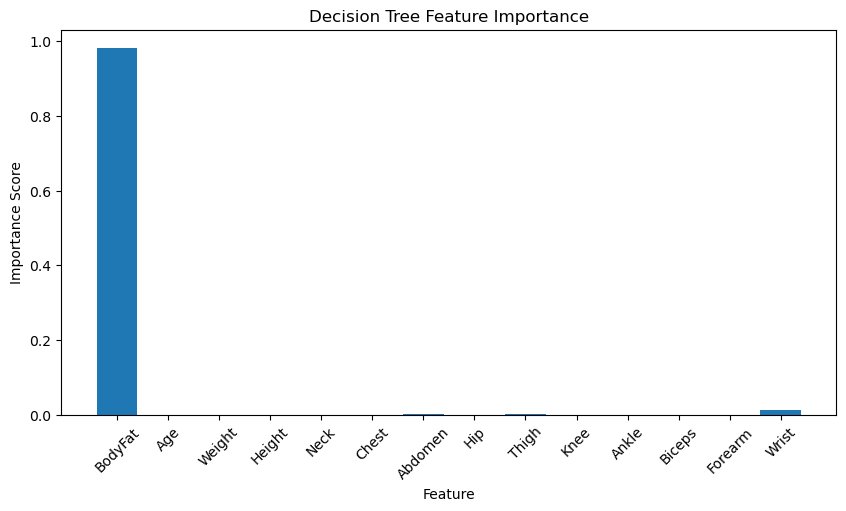

In [2]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Extract feature importance
feature_importance_dt = dt_model.feature_importances_

# Print the ranked features
print("Ranked Features using Decision Tree:")
for feature, importance in zip(X.columns, feature_importance_dt):
    print(f"{feature}: {importance}")
# Visualize feature importance
plt.figure(figsize=(10, 5))
plt.bar(X.columns, feature_importance_dt)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Decision Tree Feature Importance')
plt.xticks(rotation=45)
plt.show()


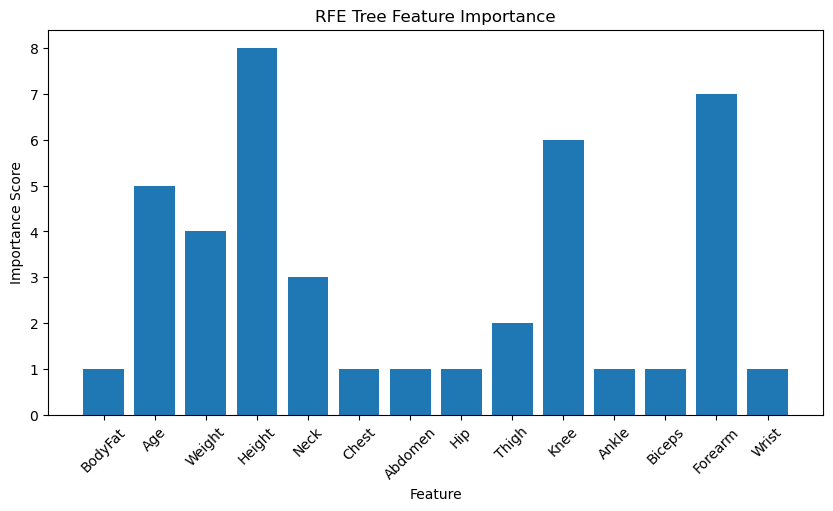

In [3]:
#RFE is a feature selection technique that recursively removes the least important features until the specified number of features is reached
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Initialize a linear regression model (can be replaced with any estimator)
estimator = LinearRegression()

# Specify the number of features to select
num_features = 7
# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=num_features)

# Fit RFE to the data
rfe.fit(X, y)

# Extract feature ranking
feature_ranking_rfe = rfe.ranking_

# Visualize feature importance
plt.figure(figsize=(10, 5))
plt.bar(X.columns, feature_ranking_rfe)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('RFE Tree Feature Importance')
plt.xticks(rotation=45)
plt.show()



Feature Importance using Random Forest:
BodyFat: 0.9830332313555163
Age: 0.0006226071292194899
Weight: 0.00207471643092328
Height: 0.004026575987941167
Neck: 0.0005554311556203125
Chest: 0.0037438002748385307
Abdomen: 0.0004082724597619735
Hip: 0.0004928403078231233
Thigh: 0.0009253088016374517
Knee: 0.0013162246614949562
Ankle: 0.0004278561659846395
Biceps: 0.0003008996318947884
Forearm: 0.000702110643892756
Wrist: 0.0013701249934511793


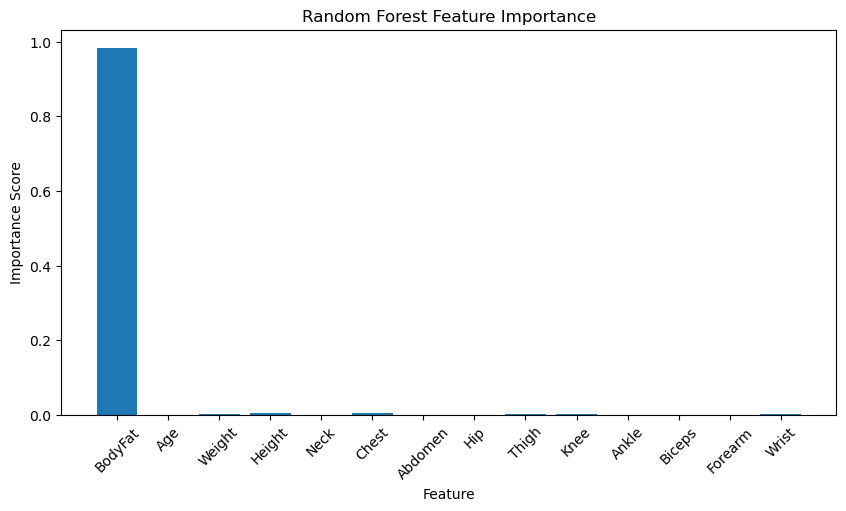

In [4]:
#Random Forest (RF) for Feature Importance Analysis
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Extract feature importance
feature_importance_rf = rf_model.feature_importances_

# Print feature importance scores
print("Feature Importance using Random Forest:")
for feature, importance in zip(X.columns, feature_importance_rf):
    print(f"{feature}: {importance}")

# Visualize feature importance
plt.figure(figsize=(10, 5))
plt.bar(X.columns, feature_importance_rf)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.show()


In [5]:
!pip install xgboost

Feature Importance using XGBoost:
BodyFat: 0.8683578968048096
Age: 0.01836780458688736
Weight: 0.003949628211557865
Height: 0.06937690079212189
Neck: 0.010478358715772629
Chest: 0.006060903891921043
Abdomen: 0.0017507371958345175
Hip: 0.0018833695212379098
Thigh: 0.003475745441392064
Knee: 0.0
Ankle: 0.009643488563597202
Biceps: 0.0036722763907164335
Forearm: 0.0014206537744030356
Wrist: 0.001562144374474883


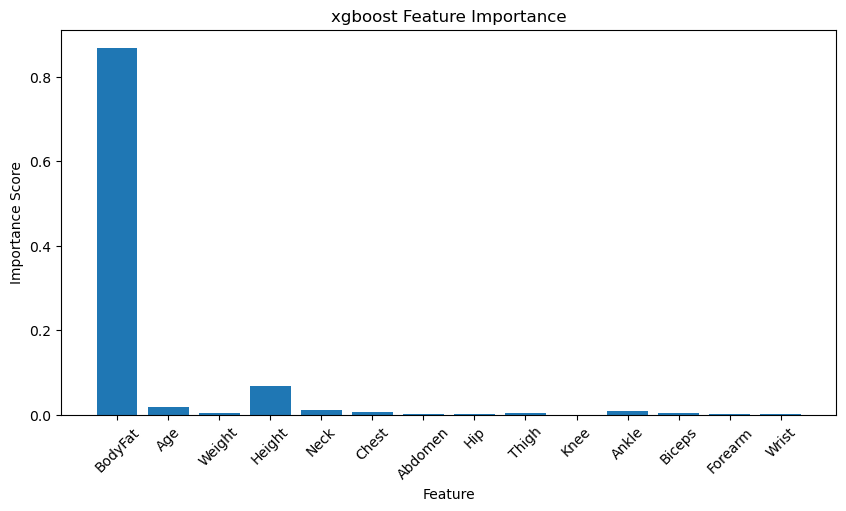

In [6]:
#XGBoost (XGB) for Feature Importance Analysis
import matplotlib.pyplot as plt
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Extract feature importance
feature_importance_xgb = xgb_model.feature_importances_

# Print feature importance scores
print("Feature Importance using XGBoost:")
for feature, importance in zip(X.columns, feature_importance_xgb):
    print(f"{feature}: {importance}")
# Visualize feature importance
plt.figure(figsize=(10, 5))
plt.bar(X.columns, feature_importance_xgb)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('xgboost Feature Importance')
plt.xticks(rotation=45)
plt.show()